In [8]:
import pandas as pd               # to import dataset and create data frames
import numpy as np                # for solving complex mathematical problems
import matplotlib.pyplot as plt   # tool for data visualization & representation
import seaborn as sns             # based on matplotlib, but with more colourful themes


import statsmodels.api as smapi
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std


In [3]:
data = pd.read_csv(r"Housing Price Prediction (1).csv")

In [5]:
data.head()

id       date      price  bedrooms  bathrooms  sqft_living  \
0  9106000005  5/27/2015  1310000.0         4       2.25         3750   
1  5101400871  5/24/2015   445500.0         2       1.75         1390   
2  7923600250  5/15/2015   450000.0         5       2.00         1870   
3  8730000270  5/14/2015   359000.0         2       2.75         1370   
4  9178601660  5/14/2015  1700000.0         5       3.00         3320   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5000     2.0           0     0  ...      8        2440           1310   
1      6670     1.0           0     0  ...      6         720            670   
2      7344     1.5           0     0  ...      7        1870              0   
3      1140     2.0           0     0  ...      8        1080            290   
4      5354     2.0           0     0  ...      9        3320              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1924             0    98115  47.6747 -122.303           2170   
1      1941             0    98115  47.6914 -122.308            920   
2      1960             0    98007  47.5951 -122.144           1870   
3      2009             0    98133  47.7052 -122.343           1370   
4      2004             0    98103  47.6542 -122.331           2330   

   sqft_lot15  
0        4590  
1        6380  
2        7650  
3        1090  
4        4040  

[5 rows x 21 columns]

In [10]:
data.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007547      0.234292      3.409825   
std    4.141264e+04      0.539683      0.086549      0.766390      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21597.000000  21597.000000   21597.000000  21597.000000  21597.000000   
mean       7.657915   1788.596842     291.725008   1970.999676     84.464787   
std        1.173200    827.759761     442.667800     29.375234    401.821438   
min        3.000000    370.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [18]:
model1 = ols("price ~ id", data=data).fit()

In [16]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     6.076
Date:                Sat, 12 Nov 2022   Prob (F-statistic):             0.0137
Time:                        17:36:21   Log-Likelihood:            -3.0739e+05
No. Observations:               21597   AIC:                         6.148e+05
Df Residuals:                   21595   BIC:                         6.148e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.501e+05   4699.710    117.051      0.000    5.41e+05    5.59e+05
id         -2.142e-06   8.69e-07     -2.465      0.014   -3.84e-06   -4.39e-07
==============================================================================
Omnibus:                    19107.049   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1136045.551
Skew:                           4.023   Prob(JB):                         0.00
Kurtosis:                      37.608   Cond. No.                     1.02e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
data.corr()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016772  0.001150   0.005162    -0.012241 -0.131911   
price         -0.016772  1.000000  0.308787   0.525906     0.701917  0.089876   
bedrooms       0.001150  0.308787  1.000000   0.514508     0.578212  0.032471   
bathrooms      0.005162  0.525906  0.514508   1.000000     0.755758  0.088373   
sqft_living   -0.012241  0.701917  0.578212   0.755758     1.000000  0.173453   
sqft_lot      -0.131911  0.089876  0.032471   0.088373     0.173453  1.000000   
floors         0.018608  0.256804  0.177944   0.502582     0.353953 -0.004814   
waterfront    -0.002727  0.266398 -0.006834   0.063744     0.103854  0.021632   
view           0.011536  0.397370  0.080008   0.188386     0.284709  0.074900   
condition     -0.023803  0.036056  0.026496  -0.126479    -0.059445 -0.008830   
grade          0.008188  0.667951  0.356563   0.665838     0.762779  0.114731   
sqft_above    -0.010799  0.605368  0.479386   0.686668     0.876448  0.184139   
sqft_basement -0.005193  0.323799  0.302808   0.283440     0.435130  0.015418   
yr_built       0.021617  0.053953  0.155670   0.507173     0.318152  0.052946   
yr_renovated  -0.016925  0.126424  0.018389   0.050544     0.055308  0.007686   
zipcode       -0.008211 -0.053402 -0.154092  -0.204786    -0.199802 -0.129586   
lat           -0.001798  0.306692 -0.009951   0.024280     0.052155 -0.085514   
long           0.020672  0.022036  0.132054   0.224903     0.241214  0.230227   
sqft_living15 -0.002701  0.585241  0.393406   0.569884     0.756402  0.144763   
sqft_lot15    -0.138557  0.082845  0.030690   0.088303     0.184342  0.718204   

                 floors  waterfront      view  condition     grade  \
id             0.018608   -0.002727  0.011536  -0.023803  0.008188   
price          0.256804    0.266398  0.397370   0.036056  0.667951   
bedrooms       0.177944   -0.006834  0.080008   0.026496  0.356563   
bathrooms      0.502582    0.063744  0.188386  -0.126479  0.665838   
sqft_living    0.353953    0.103854  0.284709  -0.059445  0.762779   
sqft_lot      -0.004814    0.021632  0.074900  -0.008830  0.114731   
floors         1.000000    0.023755  0.028814  -0.264075  0.458794   
waterfront     0.023755    1.000000  0.401971   0.016611  0.082888   
view           0.028814    0.401971  1.000000   0.045999  0.251728   
condition     -0.264075    0.016611  0.045999   1.000000 -0.146896   
grade          0.458794    0.082888  0.251728  -0.146896  1.000000   
sqft_above     0.523989    0.072109  0.167609  -0.158904  0.756073   
sqft_basement -0.245715    0.080559  0.277078   0.173849  0.168220   
yr_built       0.489193   -0.026153 -0.053636  -0.361592  0.447865   
yr_renovated   0.006427    0.092873  0.103951  -0.060788  0.014261   
zipcode       -0.059541    0.030272  0.084622   0.002888 -0.185771   
lat            0.049239   -0.014306  0.005871  -0.015102  0.113575   
long           0.125943   -0.041904 -0.078107  -0.105877  0.200341   
sqft_living15  0.280102    0.086507  0.280681  -0.093072  0.713867   
sqft_lot15    -0.010722    0.030781  0.072904  -0.003126  0.120981   

               sqft_above  sqft_basement  yr_built  yr_renovated   zipcode  \
id              -0.010799      -0.005193  0.021617     -0.016925 -0.008211   
price            0.605368       0.323799  0.053953      0.126424 -0.053402   
bedrooms         0.479386       0.302808  0.155670      0.018389 -0.154092   
bathrooms        0.686668       0.283440  0.507173      0.050544 -0.204786   
sqft_living      0.876448       0.435130  0.318152      0.055308 -0.199802   
sqft_lot         0.184139       0.015418  0.052946      0.007686 -0.129586   
floors           0.523989      -0.245715  0.489193      0.006427 -0.059541   
waterfront       0.072109       0.080559 -0.026153      0.092873  0.030272   
view             0.167609       0.277078 -0.053636      0.103951  0.084622   
condition       -0.158904       0.173849 -0.361592     -0.060788  0.

In [21]:
model2 = ols("price ~ condition", data=data).fit()

In [23]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     28.11
Date:                Sat, 12 Nov 2022   Prob (F-statistic):           1.16e-07
Time:                        17:39:14   Log-Likelihood:            -3.0738e+05
No. Observations:               21597   AIC:                         6.148e+05
Df Residuals:                   21595   BIC:                         6.148e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.709e+05   1.33e+04     35.322      0.000    4.45e+05    4.97e+05
condition   2.036e+04   3840.295      5.302      0.000    1.28e+04    2.79e+04
==============================================================================
Omnibus:                    19113.390   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1136802.126
Skew:                           4.025   Prob(JB):                         0.00
Kurtosis:                      37.619   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

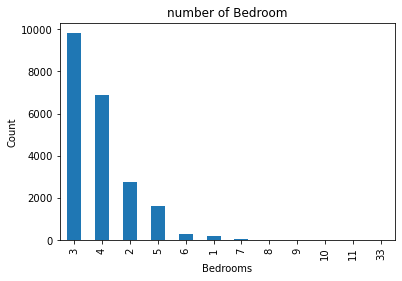

In [50]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

'"plt.ylabel(\'Longitude\', fontsize=12)\nplt.xlabel(\'Latitude\', fontsize=12)\nplt.show()\nplt1 = plt()\nsns.despine'

<Figure size 720x720 with 0 Axes>

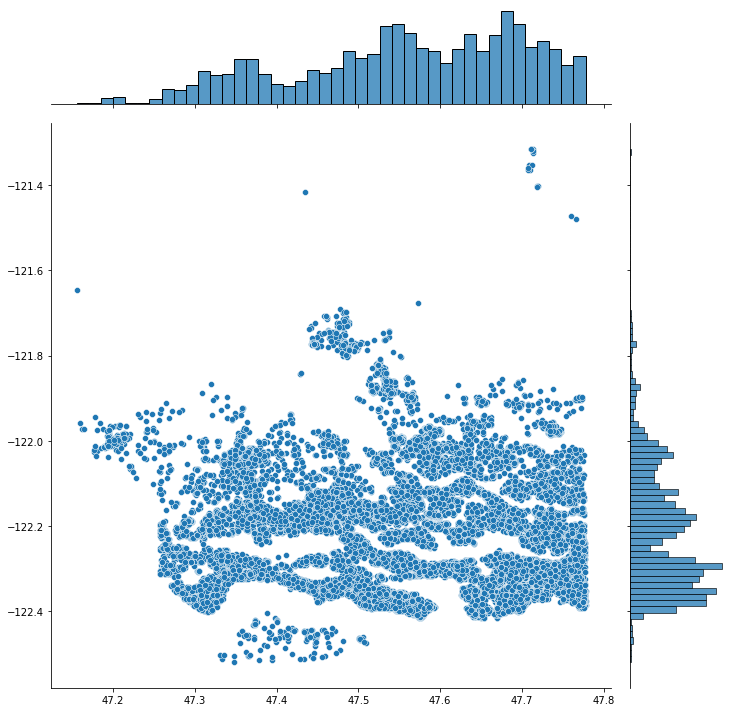

In [54]:
plt.figure(figsize=(10,10))
sns.jointplot(x=data.lat.values, y=data.long.values, height=10)
""""plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
plt1 = plt()
sns.despine"""

Text(0.5, 1.0, 'Price vs Square Feet')

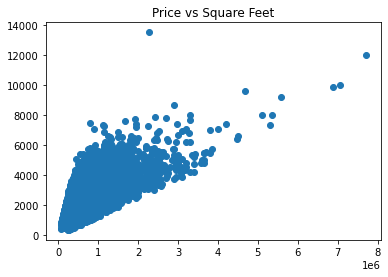

In [56]:
plt.scatter(data.price,data.sqft_living)
plt.title("Price vs Square Feet")

Text(0.5, 1.0, 'Price vs Location of the area')

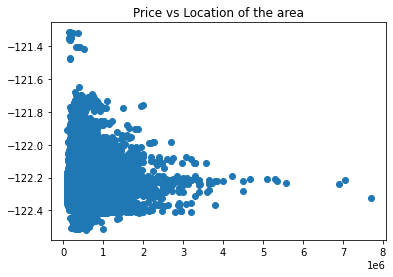

In [58]:
plt.scatter(data.price,data.long)
plt.title("Price vs Location of the area")

In [68]:
housing_model = ols("""price ~ bedrooms+bathrooms+sqft_living+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+zipcode+lat+long+sqft_living15+sqft_lot15""", data=data).fit()

In [69]:
housing_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     3148.
Date:                Sat, 12 Nov 2022   Prob (F-statistic):               0.00
Time:                        23:15:56   Log-Likelihood:            -2.9439e+05
No. Observations:               21597   AIC:                         5.888e+05
Df Residuals:                   21580   BIC:                         5.889e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       6.91e+06   2.93e+06      2.358      0.018    1.17e+06    1.27e+07
bedrooms       -3.57e+04   1900.645    -18.784      0.000   -3.94e+04    -3.2e+04
bathrooms      4.136e+04   3268.099     12.654      0.000    3.49e+04    4.78e+04
sqft_living     110.4734      2.275     48.553      0.000     106.014     114.933
floors         6263.1980   3601.678      1.739      0.082    -796.357    1.33e+04
waterfront     5.824e+05   1.74e+04     33.547      0.000    5.48e+05    6.16e+05
view           5.298e+04   2140.213     24.754      0.000    4.88e+04    5.72e+04
condition      2.667e+04   2352.989     11.337      0.000    2.21e+04    3.13e+04
grade          9.713e+04   2160.828     44.950      0.000    9.29e+04    1.01e+05
sqft_above       71.0629      2.252     31.559      0.000      66.649      75.476
sqft_basement    39.4097      2.650     14.872      0.000      34.216      44.604
yr_built      -2636.3417     72.664    -36.281      0.000   -2778.768   -2493.915
yr_renovated     19.6960      3.656      5.387      0.000      12.530      26.862
zipcode        -581.7313     32.999    -17.629      0.000    -646.412    -517.051
lat            6.012e+05   1.07e+04     56.004      0.000     5.8e+05    6.22e+05
long          -2.132e+05   1.31e+04    -16.237      0.000   -2.39e+05   -1.87e+05
sqft_living15    20.5521      3.444      5.967      0.000      13.801      27.303
sqft_lot15       -0.2549      0.053     -4.789      0.000      -0.359      -0.151
==============================================================================
Omnibus:                    18322.153   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1849635.598
Skew:                           3.552   Prob(JB):                         0.00
Kurtosis:                      47.777   Cond. No.                     2.72e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.87e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [71]:
prediction=housing_model.predict()
prediction

array([1050766.28719112,  379595.13417061,  430516.7958341 , ...,
        472555.310174  ,  608799.50677034,  339956.58550334])

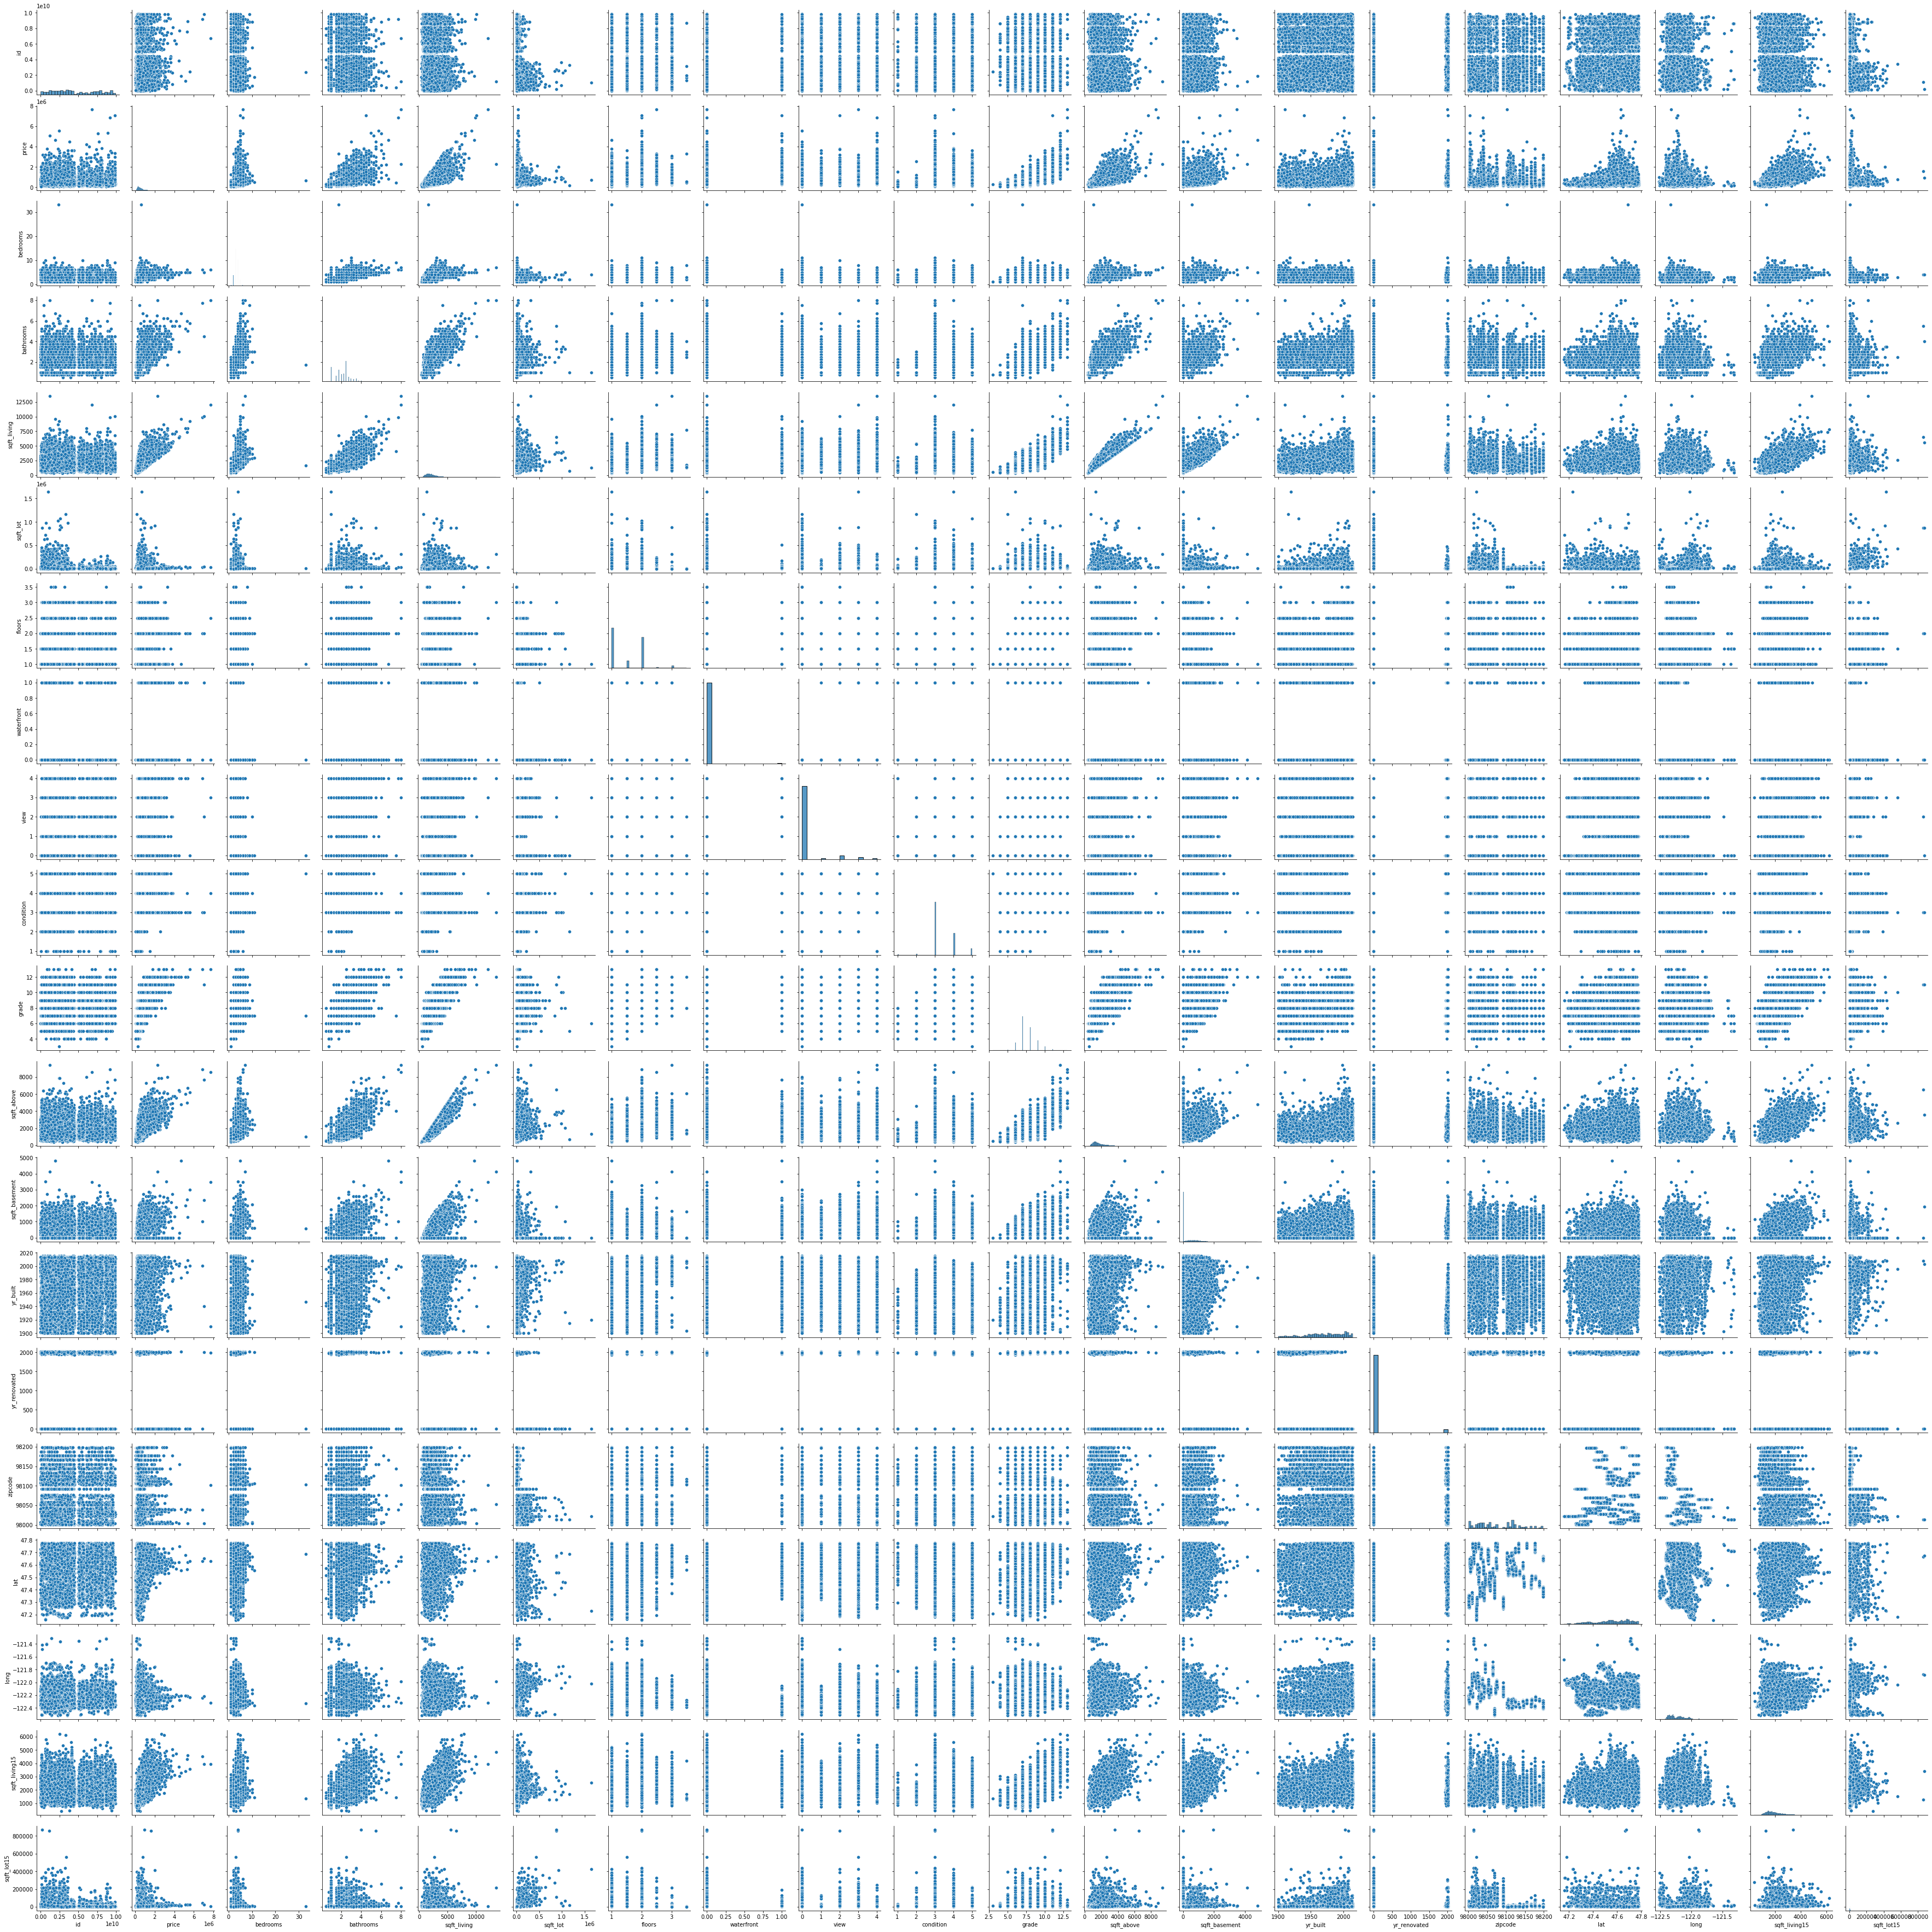

In [72]:
sns.pairplot(data)

In [75]:
housing_model = ols("""price ~ view*condition*grade**yr_built*yr_renovated*zipcode*lat*long*sqft_living15*sqft_lot15""", data=data).fit()

In [77]:
housing_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     216.1
Date:                Sun, 13 Nov 2022   Prob (F-statistic):               0.00
Time:                        00:20:15   Log-Likelihood:            -2.9399e+05
No. Observations:               21597   AIC:                         5.885e+05
Df Residuals:                   21353   BIC:                         5.904e+05
Df Model:                         243                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================================================================
                                                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                       4.88e-14   6.85e-16     71.260      0.000    4.75e-14    5.01e-14
view                                                                                                           5.528e-13   1.04e-14     53.264      0.000    5.32e-13    5.73e-13
condition                                                                                                      2.106e-13   3.34e-15     63.031      0.000    2.04e-13    2.17e-13
view:condition                                                                                                -6.077e-17   3.36e-16     -0.181      0.856   -7.18e-16    5.97e-16
grade                                                                                                         -1.389e-15   7.93e-16     -1.752      0.080   -2.94e-15    1.65e-16
view:grade                                                                                                    -1.927e-14    4.6e-16    -41.898      0.000   -2.02e-14   -1.84e-14
condition:grade                                                                                                1.509e-14   2.91e-16     51.907      0.000    1.45e-14    1.57e-14
view:condition:grade                                                                                           4.189e-14   7.37e-16     56.834      0.000    4.04e-14    4.33e-14
sqft_above                                                                                                    -3.036e-14    5.8e-16    -52.386      0.000   -3.15e-14   -2.92e-14
view:sqft_above                                                                                               -5.238e-16   5.27e-17     -9.935      0.000   -6.27e-16    -4.2e-16
condition:sqft_above                                                                                          -6.358e-15   1.22e-16    -52.228      0.000    -6.6e-15   -6.12e-15
view:condition:sqft_above                                                                                     -2.321e-14   4.48e-16    -51.776      0.000   -2.41e-14   -2.23e-14
grade:sqft_above                                                                                               8.059e-15   1.53e-16     52.576      0.000    7.76e-15    8.36e-15
view:grade:sqft_above                                                                                          2.199e-14   4.05e-16     54.239      0.000    2.12e-14    2.28e-14
condition:grade:sqft_above                               

In [80]:
housing_model2 = ols("""price ~ view*condition*grade*yr_built*yr_renovated*lat*long""", data=data).fit()

In [82]:
housing_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     477.5
Date:                Sun, 13 Nov 2022   Prob (F-statistic):               0.00
Time:                        00:22:57   Log-Likelihood:            -2.9537e+05
No. Observations:               21597   AIC:                         5.909e+05
Df Residuals:                   21504   BIC:                         5.917e+05
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
Intercept                                           -2.615e+04   3682.708     -7.101      0.000   -3.34e+04   -1.89e+04
view                                                 6.636e+04    1.4e+04      4.724      0.000    3.88e+04    9.39e+04
condition                                            3.395e+05   9.08e+04      3.738      0.000    1.61e+05    5.18e+05
view:condition                                       5.742e+04   2.53e+04      2.271      0.023    7867.572    1.07e+05
grade                                               -5.194e+05   6.56e+04     -7.920      0.000   -6.48e+05   -3.91e+05
view:grade                                           3.398e+05   7.57e+04      4.488      0.000    1.91e+05    4.88e+05
condition:grade                                      9.445e+04   1.54e+04      6.133      0.000    6.43e+04    1.25e+05
view:condition:grade                                -8.972e+04   2.28e+04     -3.934      0.000   -1.34e+05    -4.5e+04
yr_built                                            -1.303e+06   2.01e+05     -6.479      0.000    -1.7e+06   -9.09e+05
view:yr_built                                        1.007e+06   2.07e+05      4.873      0.000    6.02e+05    1.41e+06
condition:yr_built                                  -3.745e+06   5.37e+05     -6.969      0.000    -4.8e+06   -2.69e+06
view:condition:yr_built                              1.115e+06   5.79e+05      1.927      0.054   -1.92e+04    2.25e+06
grade:yr_built                                       6.574e+05   2.07e+05      3.175      0.001    2.52e+05    1.06e+06
view:grade:yr_built                                  5.551e+05   2.43e+05      2.280      0.023     7.8e+04    1.03e+06
condition:grade:yr_built                             4.024e+05   1.09e+05      3.691      0.000    1.89e+05    6.16e+05
view:condition:grade:yr_built                       -4.215e+05   1.17e+05     -3.615      0.000    -6.5e+05   -1.93e+05
yr_renovated                                         1.676e+05   1.84e+05      0.910      0.363   -1.93e+05    5.29e+05
view:yr_renovated                                    3.444e+04   4.26e+04      0.808      0.419   -4.91e+04    1.18e+05
condition:yr_renovated                               6.534e+05   5.99e+05      1.091      0.275    -5.2e+05    1.83e+06
view:condition:yr_renovated                           1.47e+05   1.33e+05      1.107      0.268   -1.13e+05    4.07e+05
grade:yr_renovated                                   1.454e+06   1.35e+06      1.079      0.281   -1.19e+06     4.1e+06
view:grade:yr_renovated                              3.263e+05   3.02e+05      1.079      0.281   -2.66e+05    9.19e+05
condition:grade:yr_renovated                         4.743e+06   4.41e+06      1.07

In [86]:
housing_model3 = ols("""price ~ bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+zipcode+lat+long+sqft_living15+sqft_lot15""", data=data).fit()

In [87]:
housing_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     3023.
Date:                Sun, 13 Nov 2022   Prob (F-statistic):               0.00
Time:                        00:29:40   Log-Likelihood:            -2.9517e+05
No. Observations:               21597   AIC:                         5.904e+05
Df Residuals:                   21581   BIC:                         5.905e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.299e+07   2.84e+06    -11.602      0.000   -3.86e+07   -2.74e+07
bedrooms       -3.15e+04   1966.926    -16.014      0.000   -3.54e+04   -2.76e+04
bathrooms      4174.6597   3198.886      1.305      0.192   -2095.393    1.04e+04
sqft_living     125.1890      2.330     53.738      0.000     120.623     129.755
sqft_lot          0.2045      0.050      4.119      0.000       0.107       0.302
floors        -2.272e+04   3646.545     -6.229      0.000   -2.99e+04   -1.56e+04
waterfront     5.922e+05    1.8e+04     32.946      0.000    5.57e+05    6.27e+05
view           6.141e+04   2208.768     27.805      0.000    5.71e+04    6.57e+04
condition      5.108e+04   2303.124     22.177      0.000    4.66e+04    5.56e+04
grade          7.823e+04   2183.214     35.834      0.000     7.4e+04    8.25e+04
sqft_above       79.2058      2.327     34.032      0.000      74.644      83.768
sqft_basement    45.9843      2.742     16.768      0.000      40.609      51.360
zipcode        -421.1367     33.931    -12.412      0.000    -487.643    -354.630
lat            6.773e+05   1.09e+04     61.883      0.000    6.56e+05    6.99e+05
long          -3.396e+05   1.32e+04    -25.666      0.000   -3.66e+05   -3.14e+05
sqft_living15    21.9448      3.573      6.142      0.000      14.941      28.948
sqft_lot15       -0.4140      0.076     -5.445      0.000      -0.563      -0.265
==============================================================================
Omnibus:                    17977.760   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1644792.292
Skew:                           3.474   Prob(JB):                         0.00
Kurtosis:                      45.184   Cond. No.                     2.67e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.06e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""